# Exercicis d'algoritmes d'Agrupació.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Data/'

/content/drive/MyDrive/Data


In [4]:
df= pd.read_csv('Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

We check if there is any user duplicated

In [5]:
df.status_id.value_counts()

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64

In [6]:
(df.status_id.value_counts() == 2).sum()

53

In [7]:
#Check a random user with 2 instances
df.loc[df.status_id == '819700534875473_972433889602136']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6194,819700534875473_972433889602136,photo,4/20/2018 3:16,1271,94,9,1249,11,8,2,1,0,NaN,NaN,NaN,NaN
6245,819700534875473_972433889602136,photo,4/20/2018 3:16,1271,94,9,1249,11,8,2,1,0,NaN,NaN,NaN,NaN


As we see, for some reason there are some user with exacly the same data twice. We need to delete all the copies 

In [8]:
df = df.drop_duplicates(subset='status_id', keep='first')

Delete the last four columns since are empty

In [11]:
df = df.iloc[:, :-4]

Delete status_id and status_published since we don't need them to make clusters.

In [12]:
df = df.drop(['status_id', 'status_published'], axis = 1)

We check if num_reactions = num_likes + num_loves + num_wows + num_hahas + num_sads + num_angrys by getting the ones that don't follow the assumption.

In [13]:

df.loc[df['num_reactions'] != (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
238,video,885,462,26,659,220,0,2,0,0
247,photo,264,2,0,256,2,5,0,0,0
248,photo,313,3,0,297,7,6,0,0,0
251,photo,247,6,0,234,9,1,0,0,0
253,photo,387,3,0,368,16,1,0,0,0
254,photo,178,9,0,170,6,0,0,0,0
256,photo,270,3,0,256,10,3,0,0,0
257,photo,351,4,1,344,6,0,0,0,0
293,video,616,523,21,459,125,21,8,0,1


In [14]:
len(df.loc[df['num_reactions'] != (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)])/len(df)*100

0.12862655423753036


Now we have two option as there are some rows that don't follow the assumption:

1- Delete the rows.

2- Change 'num_reactions' and get the correct sum.

As we assume these rows incorrent and it just represent less than 1% of the total database, we choose the option 1.

In [15]:
df = df.loc[df['num_reactions'] == (df.num_likes + df.num_loves + df.num_wows + df.num_hahas + df.num_sads + df.num_angrys)]
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [16]:
df = df.join(pd.get_dummies(df.status_type))
df = df.drop(['status_type'], axis=1)

In [17]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


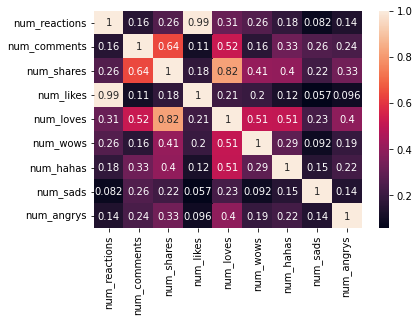

In [18]:
columns = df.iloc[:, :9].corr()

sns.heatmap(columns, annot=True)
plt.show()

We can see that the number of likes and reaccions have a hight correlation; also, the number of the loves and shares; and the number of shares and comments

### Scaling

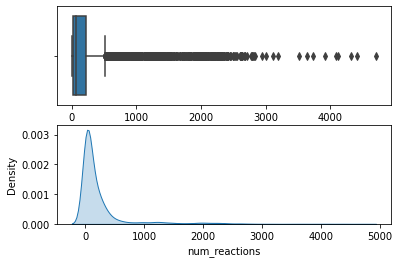

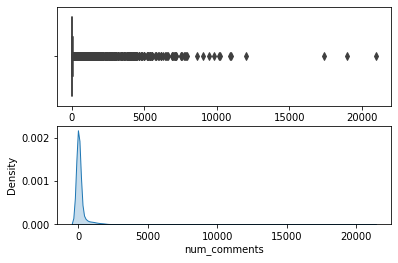

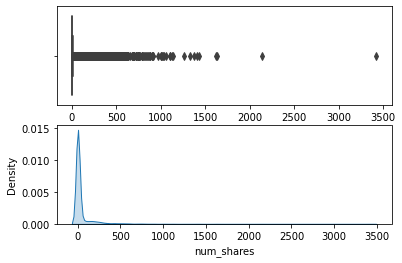

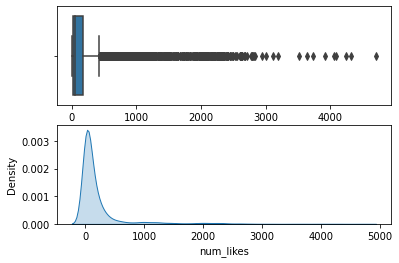

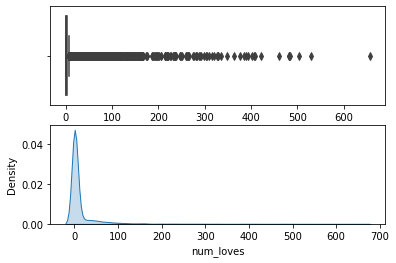

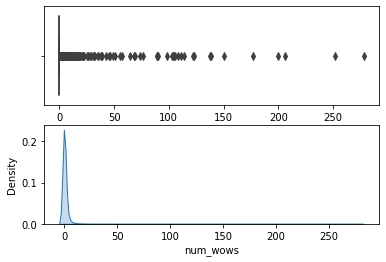

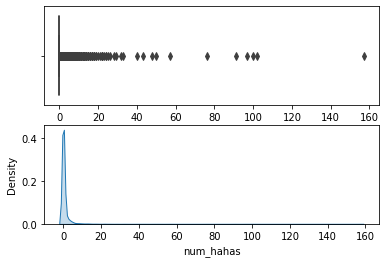

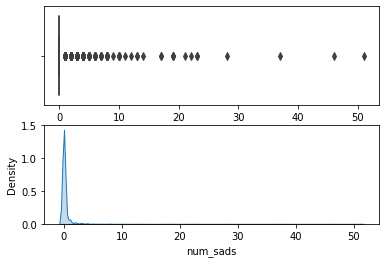

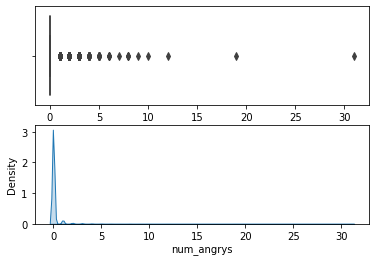

In [19]:
import warnings
warnings.filterwarnings('ignore')

trans = df.drop(['link', 'photo', 'status', 'video'], axis = 1)
#columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month', 'day', ]
for i in columns:
  f, (ax_box, ax_kde) = plt.subplots(2)
  sns.boxplot(df[i], ax = ax_box)
  sns.kdeplot(df[i], ax = ax_kde, fill=True)

We  will do the proper data scalling with Standard scaler

In [20]:

from sklearn.preprocessing import RobustScaler

columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
robust = RobustScaler().fit(df[columns])
df[columns] = robust.transform(df[columns])

### PCA

We apply PCA and print the acumulative variance for each PCA component.

The main purpose of principal component analysis is to:

* identify hidden pattern in a data set,
* reduce the dimensionnality of the data by removing the noise and redundancy in the data,
* identify correlated variables

In [21]:
from sklearn.decomposition import PCA
df_nums = df.iloc[: , :9]
pca = PCA().fit(df_nums)

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.78337207, 0.954042  , 0.97857065, 0.99165068, 0.99546717,
       0.99919016, 0.99986688, 1.        , 1.        ])

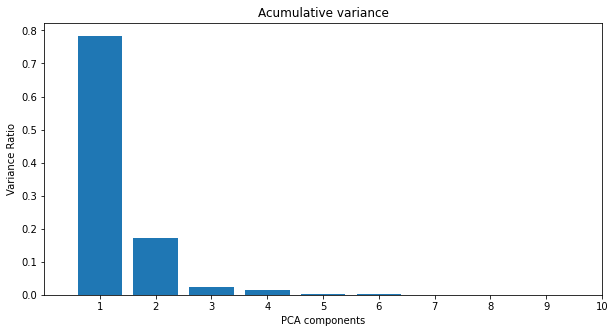

In [23]:
plt.figure(figsize = (10, 5))

plt.bar(range(1, len(pca.explained_variance_ratio_) +1 ), pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1,20))
plt.xlim([0,10])
plt.title('Acumulative variance')
plt.show()

In [24]:
pca = PCA(.95)
pca.fit(df_nums).n_components_

2

Although we should need 7 components to represent 95% of the data, we will use 4 components with 78% of representation

In [25]:
nums_names = list(df_nums.columns)
attributes_pca = pd.DataFrame({'Attribute' : nums_names, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1]})
attributes_pca

,Attribute,PC_1,PC_2
0,num_reactions,0.010750,0.016822
1,num_comments,0.776294,-0.627835
2,num_shares,0.593333,0.710845
3,num_likes,0.008662,0.014134
4,num_loves,0.201957,0.277118
5,num_wows,0.056115,0.149817
6,num_hahas,0.033299,0.027873
7,num_sads,0.008233,-0.001097
8,num_angrys,0.004467,0.004751


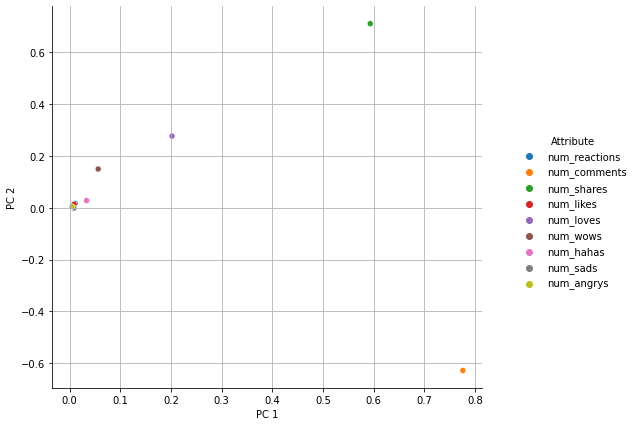

In [26]:
sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_2'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.grid(True)
plt.show()

With the information above we know how well represented are each variable through PCA's

PC 1 -> comments, shares, loves

PC 2 -> shares, loves

All atributes are well represented, we are going to apply PCA to data.

In [28]:
pca = PCA(n_components= 2)
pca.fit(df_nums)

df_pca = pd.DataFrame(pca.transform(df_nums), columns = ['PCA1', 'PCA2'])

df_pca.head()

,PCA1,PCA2
0,48.349939,38.957127
1,-14.815596,-2.186969
2,3.383506,3.412000
3,-14.819773,-2.193644
4,-14.203450,-1.345608


### Clustering

We are going to use the elbow method to see the most optimal number of clusters

In [29]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Optimal number of clusters:  3


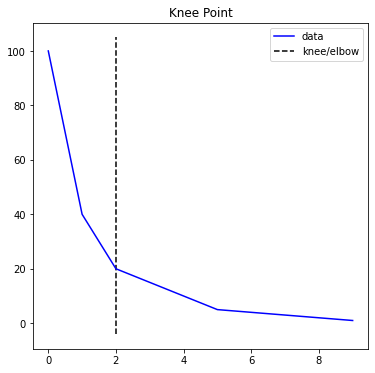

In [30]:
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator as dg
import warnings
warnings.filterwarnings('ignore')

ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


ks, inertias = dg.convex_decreasing()
kl = KneeLocator(ks, inertias, curve='convex', direction='decreasing')
kl.plot_knee()
print('Optimal number of clusters: ', kl.knee+1)

The plot shows that after 3 clusters, the change in the value of inertia is no longer significant, and most likely, neither is the variance of the rest of the data after te elbow point.

In [31]:
k_means = KMeans(n_clusters=3, random_state = 42)
k_means.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [32]:
y_pred = k_means.fit_predict(df_pca)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
df['KMeans_cluster'] = y_pred
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,KMeans_cluster
0,2.378788,22.831461,65.50,2.292683,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,1
1,0.464646,-0.179775,0.00,0.573171,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2,0.853535,10.426966,14.25,0.902439,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0
3,0.267677,-0.179775,0.00,0.335366,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
4,0.782828,-0.179775,0.00,0.902439,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.156566,-0.179775,0.00,0.201220,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
7046,-0.212121,-0.179775,0.00,-0.256098,0.333333,0.0,1.0,0.0,0.0,0,1,0,0,0
7047,-0.282828,-0.179775,0.00,-0.335366,0.333333,0.0,0.0,0.0,0.0,0,1,0,0,0
7048,1.479798,0.359551,5.50,1.786585,0.666667,0.0,0.0,0.0,0.0,0,1,0,0,0


In [36]:
df.KMeans_cluster

0       1
1       0
2       0
3       0
4       0
       ..
7045    0
7046    0
7047    0
7048    0
7049    0
Name: KMeans_cluster, Length: 6988, dtype: int32

In [52]:
graph = plt.bar(dfp.KMeans_cluster)

TypeError: ignored

In [53]:
percentage = []

p = df.KMeans_cluster.value_counts()

dfp = pd.DataFrame(data = p)
total = dfp.KMeans_cluster.sum()
for i in range(p.shape[0]):
  pct = (dfp.KMeans_cluster[i] / total) * 100
  percentage.append(round(pct,2))
dfp['Perc'] = percentage
dfp

,KMeans_cluster,Perc
0,6441,92.17
1,475,6.80
2,72,1.03


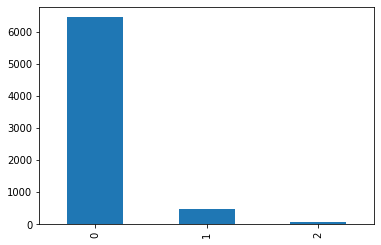

In [57]:
g = df.KMeans_cluster.value_counts().plot(kind='bar')

We see clearly a hight predominance in cluster 0 in comparison with the others.

Text(0.5, 1.0, 'PCA1 and PCA2')

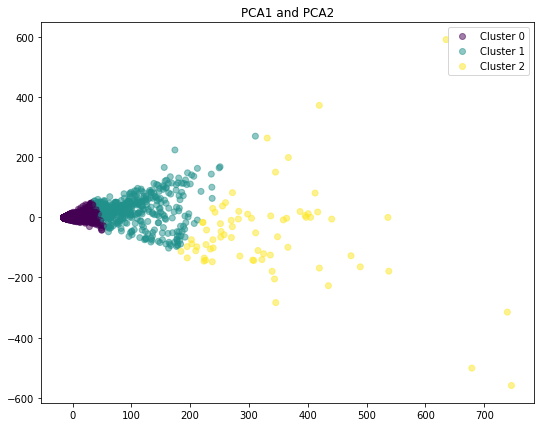

In [35]:
fig = plt.figure(figsize=(30,7))

plt.subplot(1,3,1)
plot1 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA2'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA2')


We have a good definition in all clusters. At first glance, seems that cluster 1 is the one that has more data representation in comparison with cluster 0 and 2, nevertheless, as we saw, cluster 0 has the 92.17% of the total data but more concentred.

# Exercici 2

Classifica els diferents registres utilitant l'algoritme de clustering jeràrquic

In [59]:
df_pca

,PCA1,PCA2
0,48.349939,38.957127
1,-14.815596,-2.186969
2,3.383506,3.412000
3,-14.819773,-2.193644
4,-14.203450,-1.345608
...,...,...
6983,-14.822129,-2.197409
6984,-14.729436,-2.089829
6985,-14.764182,-2.120012
6986,-10.977524,1.603042


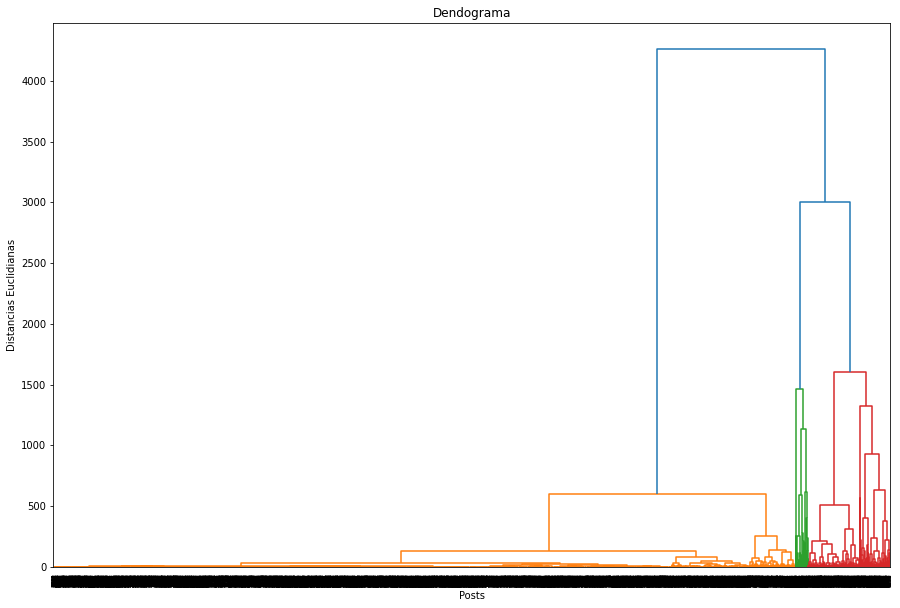

In [60]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(df_pca, method= 'ward'))

plt.title('Dendograma')
plt.xlabel('Posts')
plt.ylabel('Distancias Euclidianas')
plt.show()

Seems that we have to do it with 3 clusters again.

In [61]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(df_pca)

AgglomerativeClustering(n_clusters=3)

In [62]:
y_pred = agg.fit_predict(df_pca)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [87]:
df['agg_cluster'] = y_pred
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,KMeans_cluster,agg_cluster
0,2.378788,22.831461,65.50,2.292683,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,0,0
1,0.464646,-0.179775,0.00,0.573171,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,1
2,0.853535,10.426966,14.25,0.902439,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,1,1
3,0.267677,-0.179775,0.00,0.335366,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,1
4,0.782828,-0.179775,0.00,0.902439,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.156566,-0.179775,0.00,0.201220,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,1
7046,-0.212121,-0.179775,0.00,-0.256098,0.333333,0.0,1.0,0.0,0.0,0,1,0,0,1,1
7047,-0.282828,-0.179775,0.00,-0.335366,0.333333,0.0,0.0,0.0,0.0,0,1,0,0,1,1
7048,1.479798,0.359551,5.50,1.786585,0.666667,0.0,0.0,0.0,0.0,0,1,0,0,1,1


In [96]:
df.agg_cluster.value_counts()

1    6198
0     687
2     103
Name: agg_cluster, dtype: int64

In [89]:
percentage = []

p = df.agg_cluster.value_counts().sort_values(ignore_index = True)

dfp = pd.DataFrame(data = p)
total = dfp.agg_cluster.sum()
for i in range(p.shape[0]):
  pct = (dfp.agg_cluster[i] / total) * 100
  percentage.append(round(pct,2))
dfp['Perc'] = percentage
dfp['Perc'] = dfp.Perc.sort_values()
dfp

,agg_cluster,Perc
0,103,1.47
1,687,9.83
2,6198,88.69


Text(0.5, 1.0, 'PCA1 and PCA2')

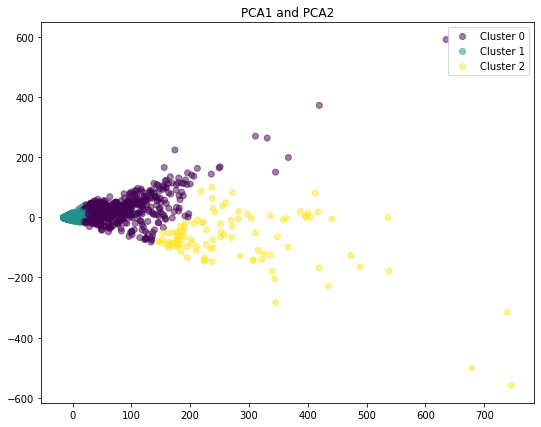

In [90]:
fig = plt.figure(figsize=(30,7))

plt.subplot(1,3,1)
plot1 = plt.scatter(x = df_pca['PCA1'], y = df_pca['PCA2'], c=y_pred, alpha = 0.5)
plt.legend(handles = plot1.legend_elements()[0], labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('PCA1 and PCA2')


In this model we have a different result in comparison with k-means:

* Cluster 0 is 9.37 times smaller.
* Cluster 1 is 13,04 times bigger.

# Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.


We are going to evaluate the silhouette score for 2, 3, 4, 5 number of cluster get get the most optimal one.

clusters 2 : 0.902
clusters 3 : 0.876
clusters 4 : 0.867
clusters 5 : 0.873


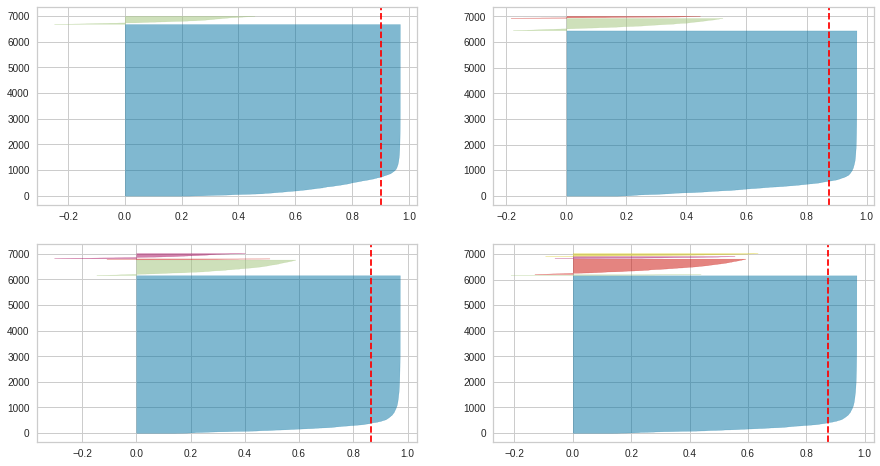

In [99]:
from yellowbrick.cluster import SilhouetteVisualizer

scores = dict()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)
    scores[i] = visualizer.silhouette_score_
_ = [print("clusters", k,":",f'{v:.3f}') for k,v in scores.items()]


As we see again, the optimal number of clusters by the silhouette coefficient score is 2 clusters (0.902).